# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

The packages required to run the code are imported in the notebook. These include:
- Yfinance: to pull data from Yahoo Finance
- Pandas: to manipulate data 
- Os and Datetime: to save files and access directories 
- Matplotlib: to plot the data 

In [16]:
# import libraries
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it available and ready-to-use using Python. The package is not officially linked to the Yahoo Finance organization, but the is regularly updated. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html. 

### Downloading the data 

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 
The data is saved with .csv format to the folder [data](/workspaces/computer-infrastructure/data), and named using a datestamp (YYYYMMDD-HHMMSS.csv).


In [17]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [18]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 

def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [19]:
# execute the function 
get_data(tickers)

[*********************100%***********************]  5 of 5 completed


#### yfinance.download()

The download method allows to dowload market information for one or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved to the folder [data](/workspaces/computer-infrastructure/data) is retrieved and plotted. The plots are saved to the folder [images/plots](/workspaces/computer-infrastructure/images/plots) and renamed using the same timestamp as the data file. The plots show:

1. Hourly Close prices in the past 5 working days of all FAANG stocks together. Name: YYYYMMDD-HHMMSS.png,
2. Subplots with End of Day (EOD) Close price in the past 5 working days for each FAANG stock indidivually. Name: YYYYMMDD-HHMMSS_subplots.png.

### Sourcing the data

The package *os* is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [20]:
# list all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

### Manipulating the data

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. 

The data import is set up in the following way: 
- the first 2 rows of the data are set as headers (the first row identifies the stock data points, the second each stock),
- the first column (datetime) is set as Index: this means that the date can be used to identify unique rows. 
- the Index (datetime) is read and imported not as object (string) but as datetime. This is a good practice, and it can be useful to capture tha data as a date/time series, and perform calculations like resampling or rolling, if required.  (see: https://pandas.pydata.org/docs/user_guide/timeseries.html#overview). 

In [21]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1], index_col=0, parse_dates=True)

# preview data 
df_latest_tickers.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                Dividends                        ...  \
Ticker                          NFLX      AAPL AMZN GOOG   META NFLX  ...   
Datetime                                                              ...   
2025-12-15 14:30:00+00:00  94.004997       0.0  0.0  0.0  0.525  0.0  ...   
2025-12-15 15:30:00+00:00  94.430000       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 16:30:00+00:00  94.000000       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 17:30:00+00:00  93.644997       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 18:30:00+00:00  93.959900       0.0  0.0  0.0  0.000  0.0  ...   

Price                     Stock Splits                       Volume           \
Ticker                            AAPL AMZN GOOG META NFLX     AAPL     AMZN   
Datetime                                                                       
2025-12-15 14:30:00+00:00          0.0  0.0  0.0  0.0  0.0  8113962  6475168   
2025-12-15 15:30:00+00:00          0.0  0.0  0.0  0.0  0.0  3495538  2713407   
2025-12-15 16:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2136284  2914110   
2025-12-15 17:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1992688  2010556   
2025-12-15 18:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2430153  2315546   

Price                                                 
Ticker                        GOOG     META     NFLX  
Datetime                                              
2025-12-15 14:30:00+00:00  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  1034648   545846  1941943  

[5 rows x 35 columns]

Headers are explored to know more about the columns (or series). This is useful to later access the data and plot it. 

In [22]:
# list colums. see: https://stackoverflow.com/questions/19482970/get-a-list-from-pandas-dataframe-column-headers
headers = list(df_latest_tickers)

headers

[('Close', 'AAPL'),
 ('Close', 'AMZN'),
 ('Close', 'GOOG'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('Dividends', 'AAPL'),
 ('Dividends', 'AMZN'),
 ('Dividends', 'GOOG'),
 ('Dividends', 'META'),
 ('Dividends', 'NFLX'),
 ('High', 'AAPL'),
 ('High', 'AMZN'),
 ('High', 'GOOG'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AAPL'),
 ('Low', 'AMZN'),
 ('Low', 'GOOG'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AAPL'),
 ('Open', 'AMZN'),
 ('Open', 'GOOG'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Stock Splits', 'AAPL'),
 ('Stock Splits', 'AMZN'),
 ('Stock Splits', 'GOOG'),
 ('Stock Splits', 'META'),
 ('Stock Splits', 'NFLX'),
 ('Volume', 'AAPL'),
 ('Volume', 'AMZN'),
 ('Volume', 'GOOG'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

The dataframe is manipulated to create new series (or columns). The new series are used to store datetime information and slice the dataframe. This is useful for the following reasons: 
1. the index with datetime format does not allow to change the date format. However, since the date is plotted on the X axis of both plots, it's useful to have a shorter and more readable date format. For this purpose, the column "Date" is created, and the date is stored there with the following format: YYYY-MM-DD HH-MM.
2. the column "Close_datetime" is created to store only EOD datetimes (each daty at 19:30). This will later be used to slice the dataframe, selecting only the rows with a Close_datetime, and plotting that data on the X axis. 

In [23]:
# Create a new "Date" column to modify datetime format
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime columns to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns. see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html 
df_latest_tickers.head(6)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   
2025-12-15 19:30:00+00:00  273.804993  222.664993  309.364990  650.994995   

Price                                Dividends                        ...  \
Ticker                          NFLX      AAPL AMZN GOOG   META NFLX  ...   
Datetime                                                              ...   
2025-12-15 14:30:00+00:00  94.004997       0.0  0.0  0.0  0.525  0.0  ...   
2025-12-15 15:30:00+00:00  94.430000       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 16:30:00+00:00  94.000000       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 17:30:00+00:00  93.644997       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 18:30:00+00:00  93.959900       0.0  0.0  0.0  0.000  0.0  ...   
2025-12-15 19:30:00+00:00  93.695000       0.0  0.0  0.0  0.000  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-15 14:30:00+00:00          0.0  0.0  0.0  8113962  6475168  3980818   
2025-12-15 15:30:00+00:00          0.0  0.0  0.0  3495538  2713407  1244270   
2025-12-15 16:30:00+00:00          0.0  0.0  0.0  2136284  2914110  1951626   
2025-12-15 17:30:00+00:00          0.0  0.0  0.0  1992688  2010556  1006522   
2025-12-15 18:30:00+00:00          0.0  0.0  0.0  2430153  2315546  1034648   
2025-12-15 19:30:00+00:00          0.0  0.0  0.0  2804616  2085163  1052803   

Price                                                    Date  \
Ticker                        META     NFLX                     
Datetime                                                        
2025-12-15 14:30:00+00:00  2264723  5610795  2025-12-15 14:30   
2025-12-15 15:30:00+00:00  1317447  2675928  2025-12-15 15:30   
2025-12-15 16:30:00+00:00   846923  2181275  2025-12-15 16:30   
2025-12-15 17:30:00+00:00   647454  2296090  2025-12-15 17:30   
2025-12-15 18:30:00+00:00   545846  1941943  2025-12-15 18:30   
2025-12-15 19:30:00+00:00   713982  2256363  2025-12-15 19:30   

Price                        Close_datetime  
Ticker                                       
Datetime                                     
2025-12-15 14:30:00+00:00                    
2025-12-15 15:30:00+00:00                    
2025-12-15 16:30:00+00:00                    
2025-12-15 17:30:00+00:00                    
2025-12-15 18:30:00+00:00                    
2025-12-15 19:30:00+00:00  2025-12-15 19:30  

[6 rows x 37 columns]

In [24]:
# create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

# show EOD data
eod_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 19:30:00+00:00  273.804993  222.664993  309.364990  650.994995   
2025-12-16 19:30:00+00:00  274.559998  222.649200  307.019989  658.859985   
2025-12-17 19:30:00+00:00  273.650085  222.020004  298.170013  653.580017   
2025-12-18 19:30:00+00:00  271.839996  226.764999  303.869995  664.539978   

Price                                Dividends                      ...  \
Ticker                          NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                            ...   
2025-12-15 19:30:00+00:00  93.695000       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-16 19:30:00+00:00  94.445000       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-17 19:30:00+00:00  94.684998       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-18 19:30:00+00:00  93.947098       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-15 19:30:00+00:00          0.0  0.0  0.0  2804616  2085163  1052803   
2025-12-16 19:30:00+00:00          0.0  0.0  0.0  1912589  2057955   927742   
2025-12-17 19:30:00+00:00          0.0  0.0  0.0  2167480  2037558  1419042   
2025-12-18 19:30:00+00:00          0.0  0.0  0.0  2747038  1798095   890340   

Price                                              Date    Close_datetime  
Ticker                        META     NFLX                                
Datetime                                                                   
2025-12-15 19:30:00+00:00   713982  2256363  2025-12-15  2025-12-15 19:30  
2025-12-16 19:30:00+00:00  1153621  1691173  2025-12-16  2025-12-16 19:30  
2025-12-17 19:30:00+00:00   644997  2322514  2025-12-17  2025-12-17 19:30  
2025-12-18 19:30:00+00:00   795351  2286772  2025-12-18  2025-12-18 19:30  

[4 rows x 37 columns]

### Plot: Hourly Close price

Once the dataframes are ready, a function is created to plot the FAANG Hourly Close prices in the past 5 days. The code uses Matplotlib (see: [matplotlib.axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html), although it's possible to plot data using Pandas DataFrame.plot, which is also based on Matplotlib: [pandas.dataframe.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). 

The function plots all the FAANG stocks in the same plot, comparing their Close price variation over the past 5 days. Since the stock Close prices have very different values, it's not easy to notice which variations are relevant for the individual stocks. However, the plot gives an idea of the overall values and compares them. 

The plot is displayed below and also saved to folder [plots/images](/workspaces/computer-infrastructure/images/plots).

> Note: the saved plot cuts off part of the X ticks. For this reason, in faang.py, a different format is specified when saving the plot. 

In [25]:
# create variables 

# Y axis 
close_price = df_latest_tickers['Close']
# get index (date and time)
# X axis
date = df_latest_tickers['Date']

In [26]:
# plot hourly close price 

def plot_close_price(date, close_price):

    fig, ax = plt.subplots()
    ax.plot(date, close_price)
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price (USD)')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small', loc = "center right")
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
    ax.set_xticks(date, labels = date, rotation = 90) 

    ax.set_title('FAANG Stocks - Close price over last 5 days')

    # save plot 
    image_name = latest_tickers_data.strip('.csv') + '.png'
    plt.savefig("images/plots/"+ image_name, dpi=100)

    # show plot 
    plt.show()

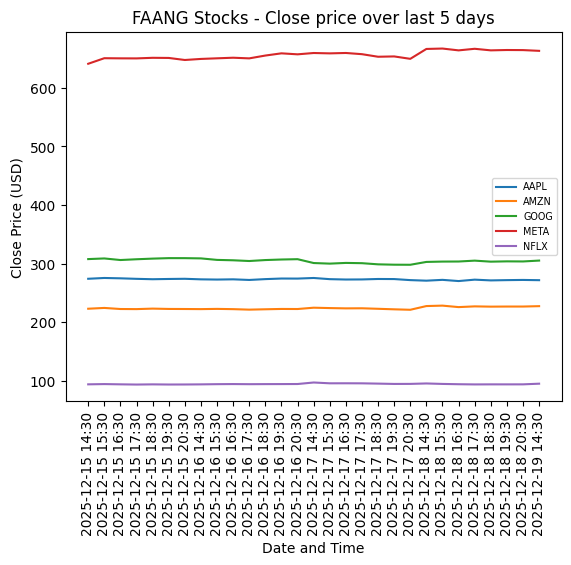

In [27]:
# execute the function 
plot_close_price(df_latest_tickers['Date'], df_latest_tickers['Close'])

### Plot: EOD Close price

A second function is created to plot subplots shoowing End of Day Close prices for each stock individually. This allows to view smaller variations (potentially, still significant for the stock), and undestand individual performance. 

In [28]:
# to add: percentage variation in value at EOD close price

# create variables for X axis 
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

# Y axis 
data = [aapl, amzn, goog, meta, nflx]
# labels 
titles = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX']

# X axis 
eod_date = eod_tickers['Date']


In [ ]:
# Function to plot the data 
# see: # See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 

def plot_close_price_subplots(data, titles):
# Put data and titles in lists for easy looping

    # Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))

    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten()

    # Plot each stock
    for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
        ax.plot(eod_date, series)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    # Hide the last unused subplot (the 6th one)
    axs[-1].set_visible(False)

    # Adjust spacing between plots
    fig.tight_layout(pad=3.0)

    # save image 
    image_name = latest_tickers_data.strip('.csv') + '_subplots.png'
    plt.savefig("images/plots/"+ image_name)

    
    plt.show()

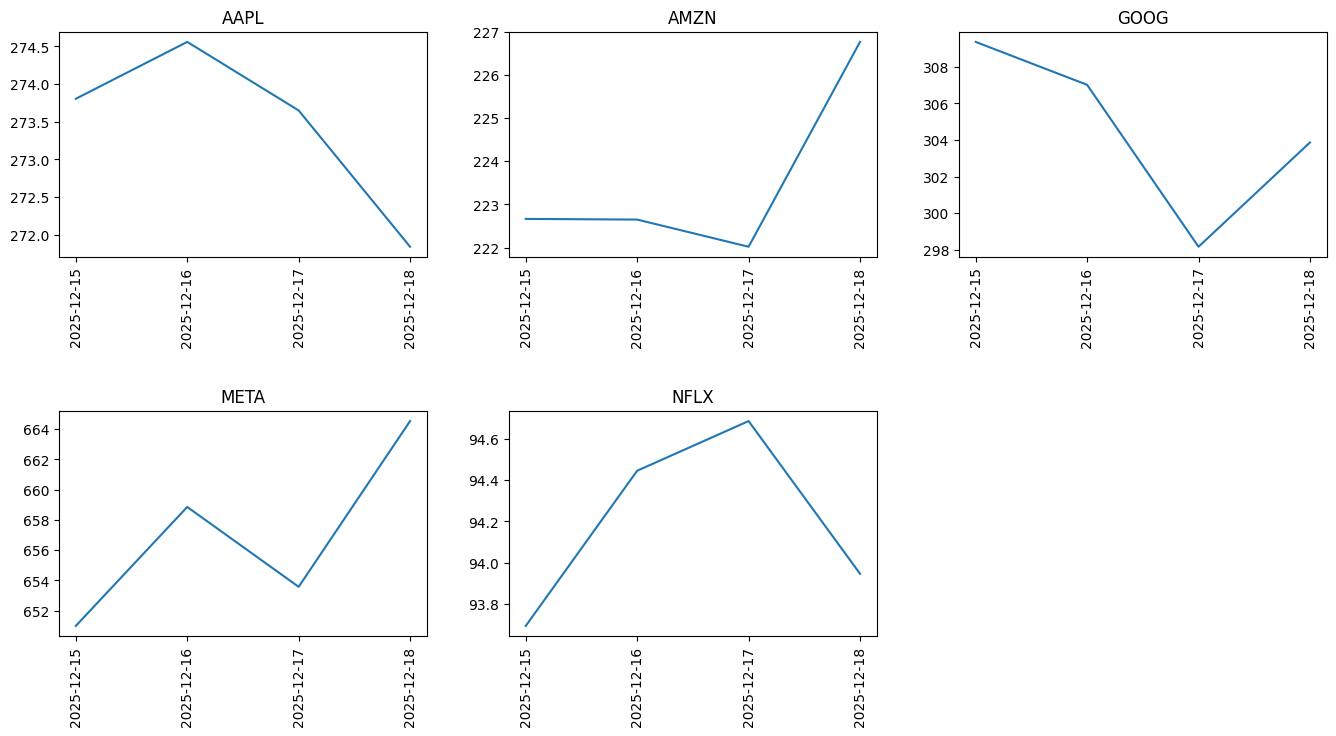

In [30]:
plot_close_price_subplots(data, titles)

> Why functions? 
> Although these functions cannot be imported in the python code faang.py as custom modules, I created them so that they could be used for other stocks, if needed. 

## Problem 3: Script 

In this section the python file *faang.py* is created in the root of the repository, and the code created so far added to the script.

The code is set up in a way that will allow to later automate the script execution with GitHub Actions. After this part of the code is implemented, the current user can execute the code and get an output solely by reaching the root of the repository and typing *./faang.py*. 

### Creating the python file 

First, the python file *faang.py* is created in the root node of the repository. Then, the code created tso far to save and plot data from Yahoo Finance is added to the script. This means that, at this stage, a user can execute the code typing in the terminal the following command: *python faang.py*. 

The following steps aim to make the file executable. This means that a user will not need to execute the program with the command above, but simply opening the file directory: *./faang.py*. 


### Adding the Shebang

To make the code executable, a **Shebang** is added on the first line of the python file. The Shebang tells the system which interpreter should be used to read the code, so that the system can search for the interpreter in the user directory.

The most important requirements when using Shebang are: 
- it needs to be added exactly on the first line of the code, otherwise it won't work,
- the best Shebang for portability is: *#! /usr/bin/env pytho* (or *python3*),
- it will be ignored on Windows systems, unless compatibility layers are added. 

Source: https://realpython.com/python-shebang/. 


<img src="/workspaces/computer-infrastructure/images/other/3_shebang.png" alt="shebang" width="600"/>

### Adding execute permission

The second step to make the file executable is to modify the file permissions. The current permissions can be viewe with the command: 

    ls -l



<img src="/workspaces/computer-infrastructure/images/other/3_permissions.png" alt="current permissions" width="900"/>

The predefined permissions are usually only read and write (-rw). To make the file exectuable, the following command is used: 

    chmod u+x filename.sh



This command makes the file executable only for the owner. To make it executable by everyone, the command would be: 

    chmod +x filename.sh

Source: https://share.google/aimode/3Ibdw9179iM9uMZt0.

<img src="/workspaces/computer-infrastructure/images/other/3_permissions_after.png" alt="after permissions" width="900"/>

### Test the code

Finally, the code is tested locating the root in the directory and typing: 

    ./faang.py

It is not unsual to have issues when making a file executable, often because the Shebang is not set up properly. 

<img src="/workspaces/computer-infrastructure/images/other/3_test_code.png" alt="test code" width="1000"/>

## Problem 4: Automation

In this section, the code execution is automated using GitHub Actions. GitHub Actions is a platform that allows to automate, test and deploy code. Source: [Quickstart for GitHub Actions](ttps://docs.github.com/en/actions/get-started/quickstart). This means that a user can create a workflow where a given *event* (or *events*) can be set up to trigger a series of *jobs*, like executing code, automatically. 

### Setting up the workflow

To set up the worklow, a new directory is created at the root level of the repository, and renamed *.github/actions*. Then, a .yml file is created inside the folder. The .yml contains the instructions for the workflow. Source: [creating-your-first-workflow](https://docs.github.com/en/actions/get-started/quickstart#creating-your-first-workflow).

### The .ymf file: faang.yml

The file includes the following elements: 

- the **name** of the workflow: 

        Get data from Yahoo Finance
- the **trigger event(s)**: 
    1. a scheduled *cron job* occurring every Saturday at 8:30AM (UTC),
    2. and a manual trigger (called workflow dispatch), which is useful to test the workflow manually, without waiting for the scheduled job to occur.Source: [GitHub worklow dispatch](https://docs.github.com/en/actions/how-tos/manage-workflow-runs/manually-run-a-workflow);
- the **permissions**: it's important to specify this because GitHub Actions needs permission to *write*, in order to commit and push new data to the repository; 
- the **jobs** to perform: 


    1. Clone the repository
    2. Install python 
    3. Install any dependencies in requirements.txt
    4. Run the script 
    5. Commit and push changes (With the option to send email notifications on the job status).

Once the .yml file is created, it's important to make sure it hasn't beed added to the .gitignore, because that would prevent pushing the file to git and setting up the workflow. 

#### About cron jobs

A **Cron Job** is a Linux program that allows users to schedule the execution of a piece of software, often in the form of a shell script or a compiled executable. Cron is typically used when you have a task that needs to be run on a fixed schedule, and/or to automate repetitive tasks like downloading files or sending emails. Source: https://cronitor.io/guides/cron-jobs. 

When setting up a cron job, the schedule expression for Cronitor can be set up on [Crontab Guru](https://crontab.guru). 

### Testing with manual trigger

Once the workflow was set up, it was tested manually using the *workflow_dispatch* event trigger. On the GitHub page of the repository, in the section "Actions", it's possible to manually trigger the event and run the code. This allows to test the code independently from the cron job, at any moment. This allows to rule out possible issues in the workflow, such as errors in the permissions, naming conventions, or directories. 

<img src="/workspaces/computer-infrastructure/images/other/4_manual_trigger.png" alt="manual trigger" width="900"/>

**Error example:**

    FileNotFoundError: [Errno 2] No such file or directory:

<img src="/workspaces/computer-infrastructure/images/other/4_error_1.png" alt="error1" width="800"/>
<img src="/workspaces/computer-infrastructure/images/other/4_error_2.png" alt="error2" width="800"/>

Explanation: The code is trying to save the data to the folder images/plots. However, if the folder does not exist, or is empty, the directory won't be found and this will trigger the error. 

Solution: Use *os* to check if the folder exists, and if not, create it: 

    if not os.path.exists('images/plots'):
        os.makedirs('images/plots') 


Source: [chaGPT](https://chatgpt.com/s/t_6944126f7db88191a2622cc79aad5bab).


### Testig the cron job

Once the workflow can be tested manually without any errors, the cron job is tested. The default setting to run the job every Saturday morrning at 8:30AM is replaced with another setting to run the job every hour, at minute 30: 

    on:
        schedule:
            #- cron: '30 8 * * 6' # Runs every Saturday at 08:30 UTC
            - cron: '30 */1 * * *' # For testing only: At minute 30 past every hour. See: https://crontab.guru/#30_*/1_*_*_*
        workflow_dispatch:

The cron job does not run exactly at the set time, but might be delayed. While testing, I noticed that the workflow would be completed ~15/20 mintes after the scheduled time. 


#### Possible errors

I initially tested my cron job to run at 8:30 of the same day. When I noticed that it was not working, I made sure that it was not due to any blockers on my side. This meant verifying permissions, and also making sure that the time I was using was correct. 

**1. Permissions**

I made sure all the required permissions were given: 

- in the code: granting *contents: write* permission, and as extra step (not required) using *secrets.GITHUB_TOKEN* [here](https://github.com/irenecelebrin/computer-infrastructure/blob/05127dc74544c71bf021b782f0c5e661b6b5b088/.github/workflows/faang.yml#L23-L24)
- on the settings page of my GitHub repository: making sure that *all actions and reusable workflows* are allowed, and that worklofws have *read and write permission*. 

Source: [chatGPT](https://chatgpt.com/s/t_69441b434d3881919d0535f3a13249e2).

<img src="/workspaces/computer-infrastructure/images/other/4_permissions_1.png" alt="permissions_1" width="800"/>
<img src="/workspaces/computer-infrastructure/images/other/4_permissions_1.2.png" alt="permissions_2" width="1000"/>

**2. Time zone**

I made sure the time I was using was correct. At the moment I am in Mexico, so I had to verify I was using the correct time zone: 

- Cron uses the server's time zone, which is by default in UTC (Coordinated Universal Time) - the same as the time in Ireland. Source: [Serverfault](https://serverfault.com/questions/791713/what-time-zone-is-a-cron-job-using), [chatGPT](https://chatgpt.com/s/t_69441b434d3881919d0535f3a13249e2). Therefore, using my local time (GMT-6) was not running the job at the expected time. Independently from the time zone, the correct cron expression is: 

        on:
        schedule:
            - cron: '30 8 * * 6' # Runs every Saturday at 08:30 UTC

- To make sure I was using the right time format, I also modified my schedule expression to run every hour (30 min after the hour), to verify the format was also correct. 

### Final observations

Now, the expected behaviour of the code is: 

- It will run automatically every Saturday morning, at 8:30AM (UTC). Expected the data to be available after ~20 minutes. 
- The repository can be downloaded, and faang.py can be executed manaually in the terminal, with the command: 

        ./faang.py

**Expected output**

- 1 .csv file in saved to the folder *data*, with stock information for each FAANG stock, in the past 5 working days. The naming follows the convetion: YYYYMMDD-HHMMSS.csv.
- 2 plots in .png format are saved to the folder **images/plots**: 
    - 1 unified plot shows the hourly Close price of each FAANG stock in the past 5 working days. The naming is: YYYYMMDD-HHMMSS.png
    - 5 subplots show End Of Day Close price for each stock separatly. The naming is: YYYYMMDD-HHMMSS_subplots.png. 


## End